In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio.v2 as imageio

In [2]:
img = imageio.imread('venera.jpg')
img = img.astype(np.float32)/255
print(img.shape)

(720, 1280, 3)


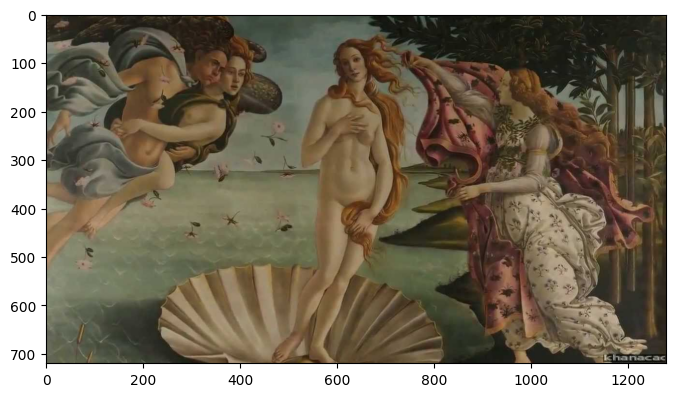

In [3]:
plt.figure(figsize=(8,8))
plt.imshow(img)

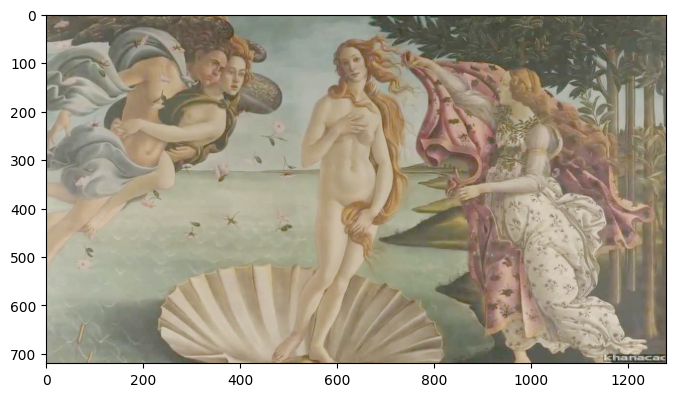

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(img**0.5) #square root

### MAking color image white and black

In [8]:
img_wb = np.mean(img, axis=2)

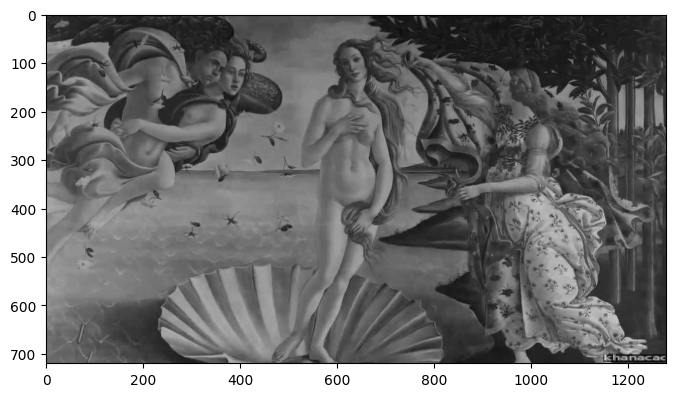

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(img_wb, cmap = 'gray') #square root

### Color HSV (Hue Saturation Value)

In [11]:
from skimage.color import rgb2hsv, hsv2rgb

In [12]:
img_hsv = rgb2hsv(img)

### Linear increase of saturation

In [15]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:,:,1] *=1.5
img_new = hsv2rgb(img_hsv_new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


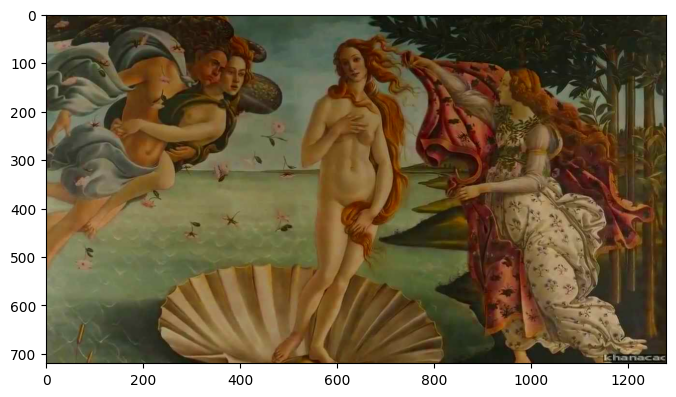

In [17]:
plt.figure(figsize=(8,8))
plt.imshow(img_new) 

### Change of tone

In [26]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:,:,0] *=3
img_new = hsv2rgb(img_hsv_new)

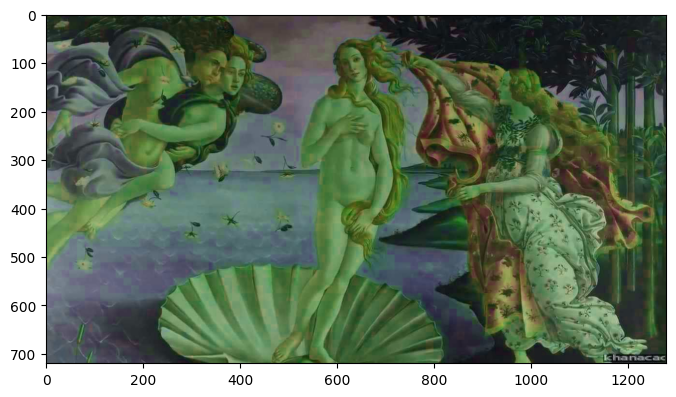

In [27]:
plt.figure(figsize=(8,8))
plt.imshow(img_new) 

### Применение сверток

**Фильтр повышения контрастности**

In [35]:
w = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
print(w.shape)
w

(3, 3)


array([[-1, -1, -1],
       [-1,  9, -1],
       [-1, -1, -1]])

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


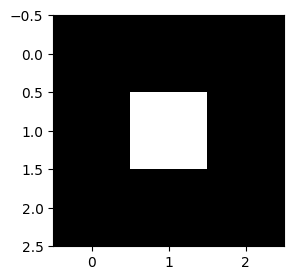

In [36]:
print(w)
plt.figure(figsize=(3,3))
plt.imshow(w, cmap='gray')

In [50]:
out_img_1 = np.zeros(
    (img.shape[0] - w.shape[0] +1,
     img.shape[1] - w.shape[1] +1,
     3),
     dtype=np.float32)


for c in range(3):
    for i in range(out_img_1.shape[0]):
        for j in range(out_img_1.shape[1]):
            x = img[i:i+w.shape[0], j:j+w.shape[1], c]
            out_img_1[i,j,c] = np.sum(w * x)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


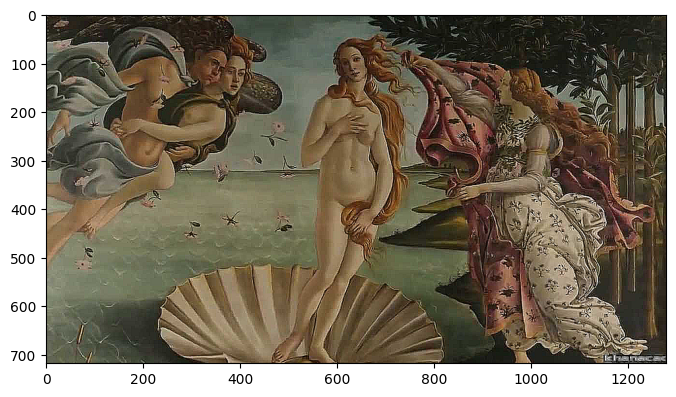

In [51]:
plt.figure(figsize=(8,8))
plt.imshow(out_img_1)